In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
ruta = os.path.join("Data", "PSCompPars_2025.10.17_15.58.36.csv")
archivo = pd.read_csv(ruta, on_bad_lines="skip", skiprows=88)
archivo
tipom = archivo[archivo["st_spectype"].str[0]=="M"]
tipog = archivo[archivo["st_spectype"].str[0]=="G"]
otros = archivo[(archivo["st_spectype"].str[0]!="G") & (archivo["st_spectype"].str[0]!="M")]
archivo.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In [ ]:
tipom["pl_rade"].describe()

count    499.000000
mean       3.986597
std        4.261937
min        0.566000
25%        1.454000
50%        2.200000
75%        3.735000
max       30.264300
Name: pl_rade, dtype: float64

In [ ]:
tipog["pl_rade"].describe()

count    763.000000
mean       9.504825
std        4.942647
min        0.400000
25%        3.875000
50%       12.300000
75%       13.500000
max       20.848740
Name: pl_rade, dtype: float64

In [ ]:
otros["pl_rade"].describe()

count    4742.000000
mean        5.406988
std         5.257079
min         0.309800
25%         1.750000
50%         2.680000
75%        10.123206
max        77.342100
Name: pl_rade, dtype: float64

<BarContainer object of 3 artists>

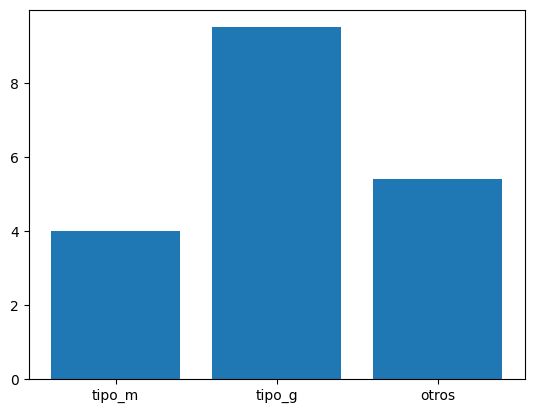

In [ ]:
plt.bar(["tipo_m", "tipo_g", "otros"],[tipom["pl_rade"].mean(), tipog["pl_rade"].mean(), otros["pl_rade"].mean()])

<Axes: xlabel='pl_rade', ylabel='Count'>

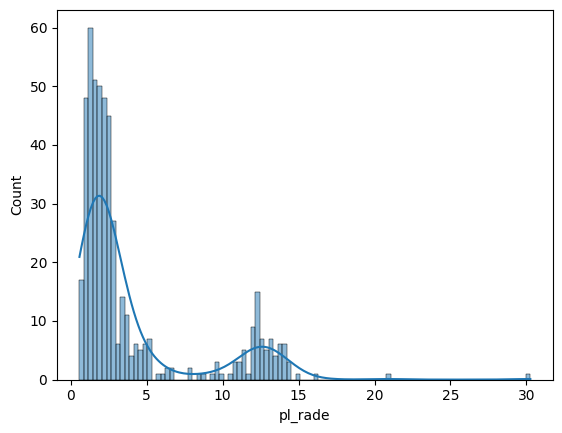

In [ ]:
sns.histplot(data=tipom["pl_rade"], kde=True, bins=100)

<Axes: xlabel='pl_rade', ylabel='Count'>

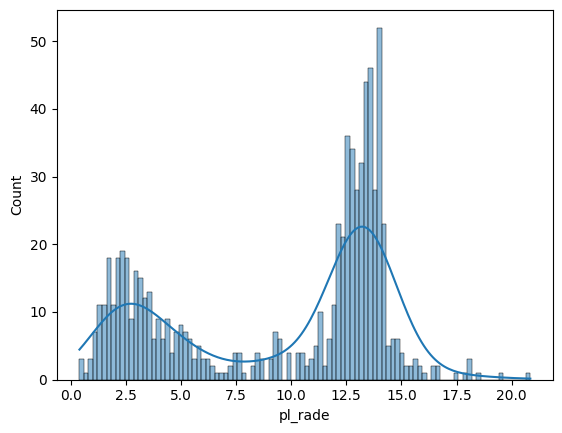

In [ ]:
sns.histplot(data=tipog["pl_rade"], kde=True, bins=100)

<Axes: xlabel='pl_rade', ylabel='Count'>

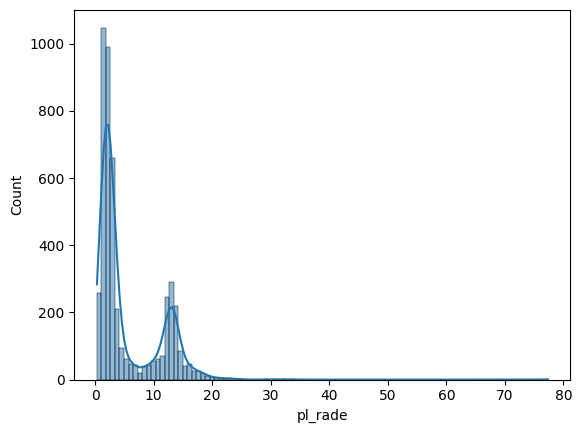

In [ ]:
sns.histplot(data=otros["pl_rade"], kde=True, bins=100)

In [ ]:
otros_tipos = archivo[(archivo["pl_rade"] < 2)]
supertierra = archivo[(archivo["pl_rade"] >= 2) & (archivo["pl_rade"] <= 10)]
gigantes = archivo[(archivo["pl_rade"] > 10)]
otros_tipos["type"] = "T"
supertierra["type"] = "S"
gigantes["type"] = "G"
tipos = pd.concat([otros_tipos, supertierra, gigantes])

C:\Users\fior2\AppData\Local\Temp\ipykernel_5248\2882049012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otros_tipos["type"] = "T"
C:\Users\fior2\AppData\Local\Temp\ipykernel_5248\2882049012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supertierra["type"] = "S"
C:\Users\fior2\AppData\Local\Temp\ipykernel_5248\2882049012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
contados = tipos.groupby(["disc_year", "type"]).size().reset_index(name="cantidad")
contados

,disc_year,type,cantidad
0,1992,T,2
1,1994,T,1
2,1995,G,1
3,1996,G,6
4,1997,G,1
...,...,...,...
71,2024,S,123
72,2024,T,46
73,2025,G,91
74,2025,S,69


<Axes: xlabel='disc_year', ylabel='cantidad'>

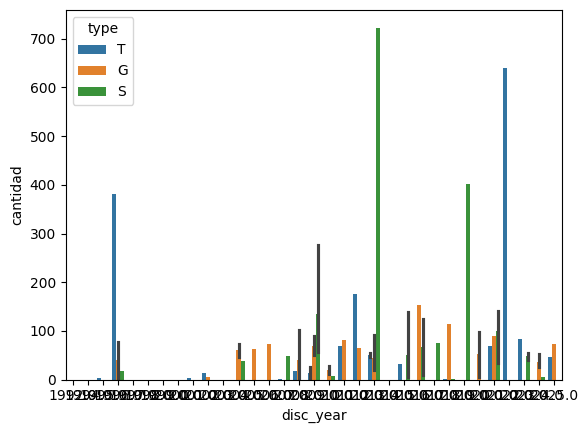

In [ ]:
sns.barplot(x=tipos["disc_year"], y=contados["cantidad"], hue=contados["type"])